In [7]:
# importing libraries
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
from scipy import spatial
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
from tqdm import tqdm
%matplotlib inline

In [2]:
# function to create density maps for images
def gaussian_filter_density(gt):
    print (gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print ('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print ('done.')
    return density

In [3]:
#setting the root to the Shanghai dataset you have downloaded
# change the root path as per your location of dataset
root = '../ShanghaiTech/'

In [4]:
part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
part_B_train = os.path.join(root,'part_B/train_data','images')
part_B_test = os.path.join(root,'part_B/test_data','images')
path_sets = [part_A_train,part_A_test]

In [5]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [8]:
for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground-truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground-truth'), 'w') as hf:
            hf['density'] = k

../ShanghaiTech/part_A/train_data\images\IMG_1.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_10.jpg
(683, 1024)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_100.jpg
(654, 1024)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_101.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_102.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_103.jpg
(400, 400)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_104.jpg
(405, 540)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_105.jpg
(632, 990)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_106.jpg
(675, 1024)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_107.jpg
(517, 800)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_108.jpg
(767, 1024)
generate density...
done.
../Sha

../ShanghaiTech/part_A/train_data\images\IMG_180.jpg
(386, 509)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_181.jpg
(639, 1024)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_182.jpg
(680, 1024)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_183.jpg
(687, 1024)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_184.jpg
(617, 1024)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_185.jpg
(800, 583)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_186.jpg
(653, 460)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_187.jpg
(387, 1024)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_188.jpg
(649, 1024)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_189.jpg
(280, 692)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_19.jpg
(600, 900)
generate density...
done.
../Sh

../ShanghaiTech/part_A/train_data\images\IMG_261.jpg
(359, 478)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_262.jpg
(576, 1024)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_263.jpg
(453, 680)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_264.jpg
(576, 1024)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_265.jpg
(464, 370)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_266.jpg
(391, 630)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_267.jpg
(521, 1024)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_268.jpg
(600, 900)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_269.jpg
(400, 600)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_27.jpg
(572, 945)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_270.jpg
(300, 416)
generate density...
done.
../Shang

done.
../ShanghaiTech/part_A/train_data\images\IMG_73.jpg
(544, 932)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_74.jpg
(479, 720)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_75.jpg
(681, 1024)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_76.jpg
(563, 832)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_77.jpg
(684, 1024)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_78.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_79.jpg
(820, 1024)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_8.jpg
(465, 700)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_80.jpg
(426, 634)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_81.jpg
(282, 377)
generate density...
done.
../ShanghaiTech/part_A/train_data\images\IMG_82.jpg
(750, 1000)
generate density...
done.
../Shanghai

../ShanghaiTech/part_A/test_data\images\IMG_155.jpg
(1024, 680)
generate density...
done.
../ShanghaiTech/part_A/test_data\images\IMG_156.jpg
(552, 1024)
generate density...
done.
../ShanghaiTech/part_A/test_data\images\IMG_157.jpg
(676, 1024)
generate density...
done.
../ShanghaiTech/part_A/test_data\images\IMG_158.jpg
(428, 594)
generate density...
done.
../ShanghaiTech/part_A/test_data\images\IMG_159.jpg
(580, 882)
generate density...
done.
../ShanghaiTech/part_A/test_data\images\IMG_16.jpg
(419, 536)
generate density...
done.
../ShanghaiTech/part_A/test_data\images\IMG_160.jpg
(359, 478)
generate density...
done.
../ShanghaiTech/part_A/test_data\images\IMG_161.jpg
(540, 960)
generate density...
done.
../ShanghaiTech/part_A/test_data\images\IMG_162.jpg
(448, 610)
generate density...
done.
../ShanghaiTech/part_A/test_data\images\IMG_163.jpg
(500, 649)
generate density...
done.
../ShanghaiTech/part_A/test_data\images\IMG_164.jpg
(265, 701)
generate density...
done.
../ShanghaiTech/par

../ShanghaiTech/part_A/test_data\images\IMG_74.jpg
(742, 1024)
generate density...
done.
../ShanghaiTech/part_A/test_data\images\IMG_75.jpg
(500, 650)
generate density...
done.
../ShanghaiTech/part_A/test_data\images\IMG_76.jpg
(450, 676)
generate density...
done.
../ShanghaiTech/part_A/test_data\images\IMG_77.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_A/test_data\images\IMG_78.jpg
(683, 1024)
generate density...
done.
../ShanghaiTech/part_A/test_data\images\IMG_79.jpg
(477, 718)
generate density...
done.
../ShanghaiTech/part_A/test_data\images\IMG_8.jpg
(684, 1024)
generate density...
done.
../ShanghaiTech/part_A/test_data\images\IMG_80.jpg
(690, 1024)
generate density...
done.
../ShanghaiTech/part_A/test_data\images\IMG_81.jpg
(343, 743)
generate density...
done.
../ShanghaiTech/part_A/test_data\images\IMG_82.jpg
(370, 545)
generate density...
done.
../ShanghaiTech/part_A/test_data\images\IMG_83.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_A/test

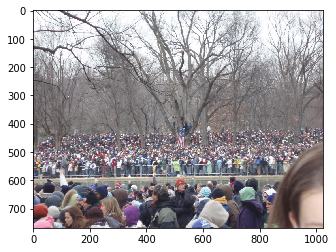

In [9]:
plt.imshow(Image.open(img_paths[0]))

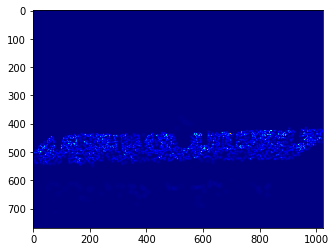

In [10]:
gt_file = h5py.File(img_paths[0].replace('.jpg','.h5').replace('images','ground-truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [11]:
np.sum(groundtruth)

1543.841

In [12]:
path_sets = [part_B_train,part_B_test]
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
        
# creating density map for part_b images

for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground-truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground-truth'), 'w') as hf:
            hf['density'] = k

../ShanghaiTech/part_B/train_data\images\IMG_1.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_10.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_100.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_101.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_102.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_103.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_104.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_105.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_106.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_107.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_108.jpg
(768, 1024)
generate density...
done.
..

../ShanghaiTech/part_B/train_data\images\IMG_180.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_181.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_182.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_183.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_184.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_185.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_186.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_187.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_188.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_189.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_19.jpg
(768, 1024)
generate density...
done.


../ShanghaiTech/part_B/train_data\images\IMG_261.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_262.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_263.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_264.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_265.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_266.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_267.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_268.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_269.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_27.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_270.jpg
(768, 1024)
generate density...
done.


../ShanghaiTech/part_B/train_data\images\IMG_342.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_343.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_344.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_345.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_346.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_347.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_348.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_349.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_35.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_350.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_351.jpg
(768, 1024)
generate density...
done.


../ShanghaiTech/part_B/train_data\images\IMG_63.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_64.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_65.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_66.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_67.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_68.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_69.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_7.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_70.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_71.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/train_data\images\IMG_72.jpg
(768, 1024)
generate density...
done.
../Shanghai

../ShanghaiTech/part_B/test_data\images\IMG_145.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_146.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_147.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_148.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_149.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_15.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_150.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_151.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_152.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_153.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_154.jpg
(768, 1024)
generate density...
done.
../Shanghai

../ShanghaiTech/part_B/test_data\images\IMG_227.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_228.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_229.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_23.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_230.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_231.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_232.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_233.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_234.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_235.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_236.jpg
(768, 1024)
generate density...
done.
../Shanghai

../ShanghaiTech/part_B/test_data\images\IMG_309.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_31.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_310.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_311.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_312.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_313.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_314.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_315.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_316.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_32.jpg
(768, 1024)
generate density...
done.
../ShanghaiTech/part_B/test_data\images\IMG_33.jpg
(768, 1024)
generate density...
done.
../ShanghaiTe